In [1]:
install.packages("readr")
library(readr)
data<-read_csv('Export_rice_prices_5percent_broken_vn.csv')

Installing package into 'C:/Users/ASUS/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'readr' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'readr'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\ASUS\AppData\Local\R\win-library\4.2\00LOCK\readr\libs\x64\readr.dll to C:\Users\ASUS\AppData\Local\R\win-library\4.2\readr\libs\x64\readr.dll: Permission denied"
Warning message:
"restored 'readr'"



The downloaded binary packages are in
	C:\Users\ASUS\AppData\Local\Temp\RtmpMxRk3r\downloaded_packages


Rows: 225 Columns: 2
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (1): date
dbl (1): price

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [2]:
#2. In một số thông tin chung từ dữ liệu: head(), str()...
head(data)
tail(data)
str(data)
summary(data)

date,price
<chr>,<dbl>
1/1/2004,198.82
2/1/2004,204.07
3/1/2004,225.80
4/1/2004,240.71
5/1/2004,236.14
6/1/2004,230.74


date,price
<chr>,<dbl>
4/1/2022,402.38
5/1/2022,406.45
6/1/2022,411.92
7/1/2022,411.09
8/1/2022,395.80
9/1/2022,391.78


spc_tbl_ [225 × 2] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ date : chr [1:225] "1/1/2004" "2/1/2004" "3/1/2004" "4/1/2004" ...
 $ price: num [1:225] 199 204 226 241 236 ...
 - attr(*, "spec")=
  .. cols(
  ..   date = col_character(),
  ..   price = col_double()
  .. )
 - attr(*, "problems")=<externalptr> 


     date               price      
 Length:225         Min.   :198.8  
 Class :character   1st Qu.:341.0  
 Mode  :character   Median :386.9  
                    Mean   :386.3  
                    3rd Qu.:431.1  
                    Max.   :780.0  

In [3]:
#3. Chuyển dữ liệu này thành Time Series object => in Time Series object
library('tidyverse')
price.timeseries<-ts(data$price,start=c(2004,1),end=c(2022,9),frequency=12)

── Attaching packages ─────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ dplyr   1.0.10
✔ tibble  3.1.8      ✔ stringr 1.4.1 
✔ tidyr   1.2.1      ✔ forcats 0.5.2 
✔ purrr   0.3.5      
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


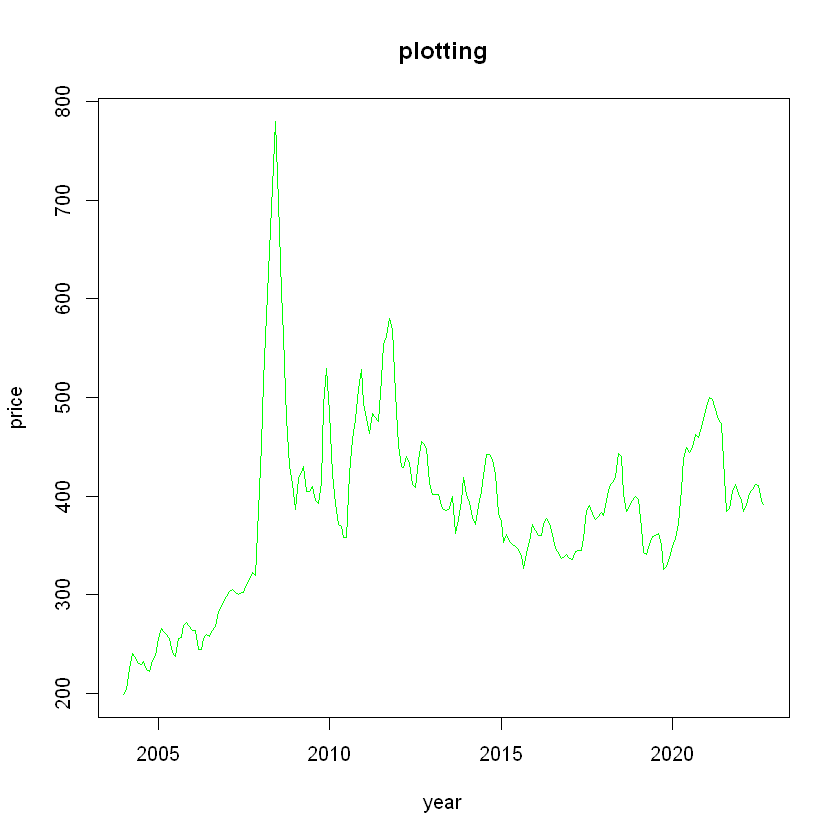

In [4]:
#4. Vẽ Time Series object vừa tạo
plot(price.timeseries,main='plotting',col='green',xlab='year',ylab='price')

In [5]:
#5. Thực hiện việc decompostition, trực quan và nhận xét
comp=decompose(price.timeseries)

In [6]:
comp$x

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2004,198.8200,204.0700,225.8000,240.7100,236.1400,230.7400,228.9600,232.7200,224.1700,222.1400,233.0700,238.5100
2005,255.3200,265.6400,262.9200,259.9200,256.1400,241.4900,237.2800,255.6500,257.0000,269.3600,272.0000,267.9300
2006,263.8600,264.2900,244.8600,244.2500,256.2300,259.4300,257.4300,263.6300,267.7100,283.2100,288.1575,293.1050
2007,298.0525,303.0000,304.9300,302.2500,300.3600,302.4900,302.7100,310.0000,315.2500,323.0000,320.0000,385.7143
2008,451.4286,517.1429,582.8571,648.5714,714.2857,780.0000,698.0000,607.5000,561.7800,478.5700,431.0700,413.0000
2009,386.7900,418.0900,424.0450,430.0000,405.1800,404.2800,410.2300,395.7200,392.8600,414.1100,491.6000,529.9100
2010,485.2800,421.7800,392.5700,371.1700,368.8200,358.2200,357.8600,422.8600,457.6800,477.6800,508.0300,528.2900
2011,493.8600,478.5700,464.0000,484.2900,479.6400,475.2800,519.4600,553.4300,561.4300,580.5400,568.7500,504.4300
2012,451.4300,430.4300,428.7500,440.7200,433.2900,411.9600,409.2800,436.4300,455.1800,453.7400,448.3200,413.7500
2013,401.2400,401.6400,401.6100,390.7600,386.8500,385.9300,387.7400,399.4400,362.0000,376.3200,395.8800,419.4100


In [7]:
comp$seasonal

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2004,-3.347346,-5.801344,-5.645758,-1.050566,3.258657,6.945943,2.964794,1.595396,-2.624998,-2.488748,2.550974,3.642995
2005,-3.347346,-5.801344,-5.645758,-1.050566,3.258657,6.945943,2.964794,1.595396,-2.624998,-2.488748,2.550974,3.642995
2006,-3.347346,-5.801344,-5.645758,-1.050566,3.258657,6.945943,2.964794,1.595396,-2.624998,-2.488748,2.550974,3.642995
2007,-3.347346,-5.801344,-5.645758,-1.050566,3.258657,6.945943,2.964794,1.595396,-2.624998,-2.488748,2.550974,3.642995
2008,-3.347346,-5.801344,-5.645758,-1.050566,3.258657,6.945943,2.964794,1.595396,-2.624998,-2.488748,2.550974,3.642995
2009,-3.347346,-5.801344,-5.645758,-1.050566,3.258657,6.945943,2.964794,1.595396,-2.624998,-2.488748,2.550974,3.642995
2010,-3.347346,-5.801344,-5.645758,-1.050566,3.258657,6.945943,2.964794,1.595396,-2.624998,-2.488748,2.550974,3.642995
2011,-3.347346,-5.801344,-5.645758,-1.050566,3.258657,6.945943,2.964794,1.595396,-2.624998,-2.488748,2.550974,3.642995
2012,-3.347346,-5.801344,-5.645758,-1.050566,3.258657,6.945943,2.964794,1.595396,-2.624998,-2.488748,2.550974,3.642995
2013,-3.347346,-5.801344,-5.645758,-1.050566,3.258657,6.945943,2.964794,1.595396,-2.624998,-2.488748,2.550974,3.642995


In [8]:
comp$trend

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2004,NA,NA,NA,NA,NA,NA,228.6750,233.5946,237.7067,240.0538,241.6875,242.9687
2005,243.7633,245.0654,247.3887,250.7242,254.3137,257.1617,258.7433,259.0429,258.2342,256.8288,256.1796,256.9308
2006,258.5179,259.6900,260.4688,261.4921,262.7424,264.4646,266.9382,269.9758,274.0917,279.0112,283.2667,286.8996
2007,290.5804,294.3992,298.3121,301.9508,304.9355,310.1210,320.3704,335.6837,356.1866,382.1970,413.8739,451.0171
2008,487.3837,516.2500,538.9179,555.6721,566.7821,572.5469,570.9905,564.1701,553.4257,537.7014,515.7148,487.1804
2009,459.5350,438.7204,422.8579,413.1337,412.9700,420.3633,429.3383,433.5958,432.4381,428.6754,424.7092,421.2750
2010,417.1738,416.1225,419.9542,425.3038,428.6371,429.2542,429.5442,432.2679,437.6104,445.3000,454.6308,464.1258
2011,475.7367,487.9104,497.6737,506.2825,513.0983,514.6342,511.8721,508.0983,504.6238,501.3396,497.5929,493.0233
2012,485.7942,476.3283,467.0262,457.3158,447.0146,438.2183,432.3488,429.0579,426.7275,423.5150,419.4983,416.4788
2013,414.4967,412.0579,406.6342,399.5258,394.1150,392.1658,392.4333,392.1117,390.7983,389.0113,388.3354,389.2604


In [9]:
comp$random

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2004,NA,NA,NA,NA,NA,NA,-2.6797939,-2.4699791,-10.9116689,-15.4250023,-11.1684745,-8.1017450
2005,14.9040123,26.3759270,21.1770083,10.2463993,-1.4324067,-22.6176098,-24.4281273,-4.9883124,1.3908311,15.0199977,13.2694422,7.3561717
2006,8.6894290,10.4013436,-9.9629917,-16.1915174,-9.7710526,-11.9805265,-12.4730231,-7.9412291,-3.7566689,6.6874977,2.3398589,2.5624217
2007,10.8194290,14.4021770,12.2636750,1.3497326,-7.8341776,-14.5769551,-20.6251957,-27.2790862,-38.3116094,-56.7082165,-96.4249030,-68.9457926
2008,-32.6078330,6.6942007,49.5849846,93.9499112,144.2449742,200.5071521,124.0446704,41.7345447,10.9793132,-56.6426213,-87.1957959,-77.8234116
2009,-69.3976544,-14.8290730,6.8328417,17.9168159,-11.0486567,-23.0292765,-22.0731273,-39.4712291,-36.9531273,-12.0766689,64.3398589,104.9920050
2010,71.4535956,11.4588436,-21.7384083,-53.0831841,-63.0757401,-77.9801098,-74.6489606,-11.0033124,22.6945811,34.8687477,50.8481922,60.5211717
2011,21.4706790,-3.5390730,-28.0279917,-20.9419341,-36.7169901,-46.3001098,4.6231227,43.7362709,59.4312477,81.6891644,68.6061089,7.7636717
2012,-31.0168210,-40.0969897,-32.6304917,-15.5452674,-16.9832401,-33.2042765,-26.0335439,5.7766876,31.0774977,32.7137477,26.2706922,-6.3717450
2013,-9.9093210,-4.6165730,0.6215917,-7.7152674,-10.5236567,-13.1817765,-7.6581273,5.7329376,-26.1733356,-10.2025023,4.9936089,26.5065884


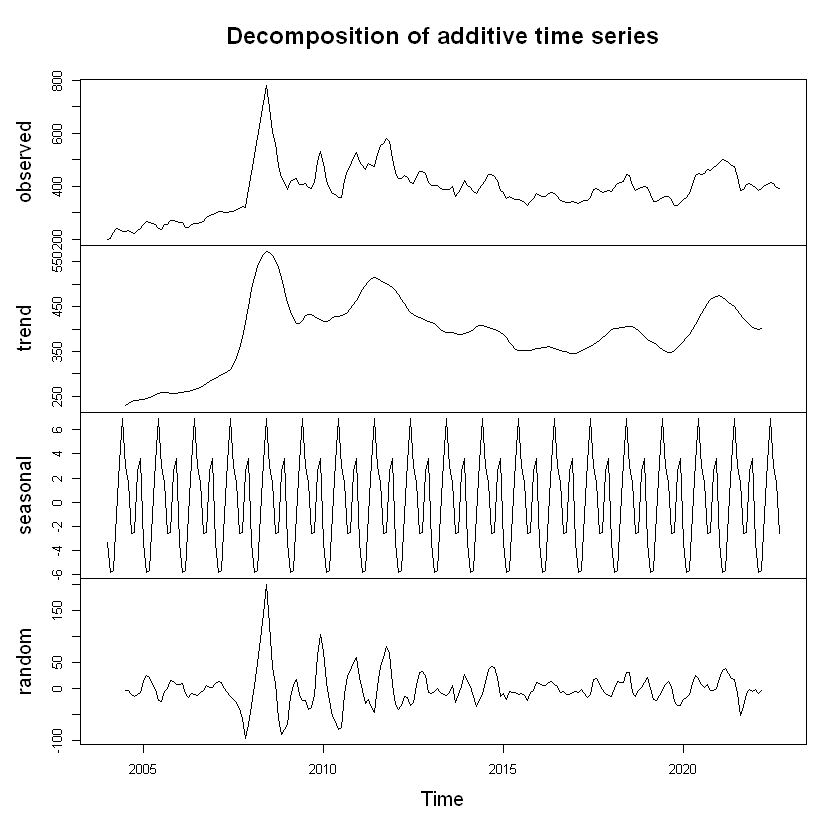

In [10]:
plot(comp)

Nhận xét: dữ liệu không theo xu hướng nhưng có xu hướng theo mùa, có đột biến tăng vào năm 6/2008 đột biến giảm tháng 11/2007

In [12]:
#6. Thực hiện việc dự báo và vẽ biểu đồ so sánh với thực tiễn. Nhận xét.
price.timeseries.forecasts<-HoltWinters(price.timeseries)
print(price.timeseries.forecasts)

Holt-Winters exponential smoothing with trend and additive seasonal component.

Call:
HoltWinters(x = price.timeseries)

Smoothing parameters:
 alpha: 1
 beta : 0
 gamma: 0

Coefficients:
           [,1]
a   405.1413889
b     2.2326981
s1  -17.7384722
s2   -8.4422222
s3   -4.2834722
s4   11.7319444
s5   20.7498611
s6   15.7065278
s7    9.3711111
s8    2.0015278
s9  -15.4963889
s10   0.4602778
s11  -0.6993056
s12 -13.3613889


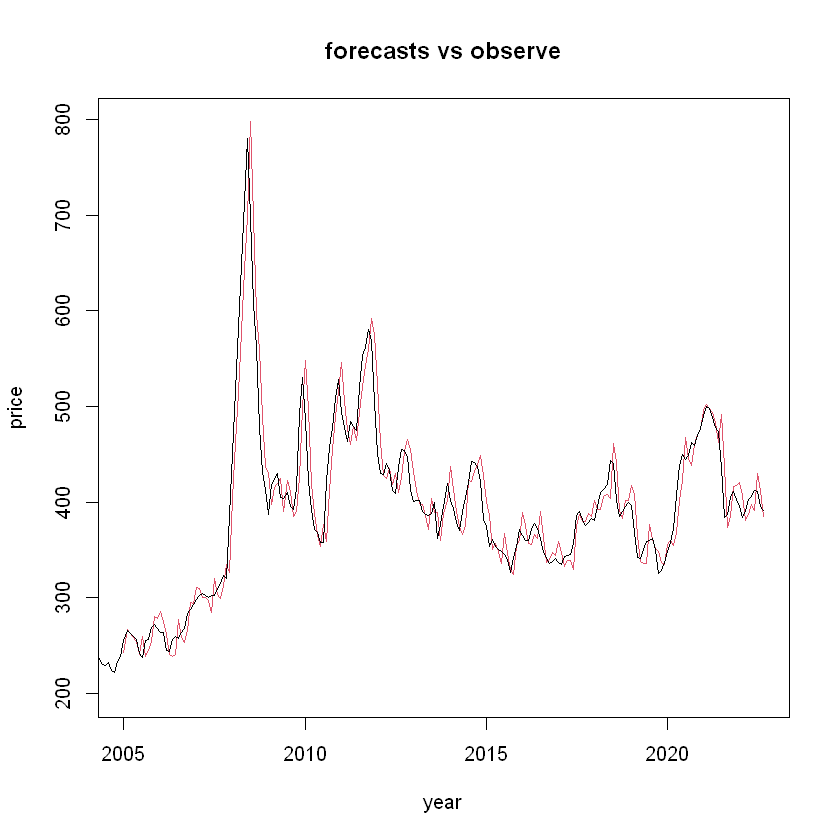

In [14]:
plot(price.timeseries.forecasts,main='forecasts vs observe',xlab='year',ylab='price')

Nhận xét: dự đoán tương đối sát với quan sát
alpha cao cho thấy giá trị hiện tại phụ thuộc các giá trị trong quá khứ
beta = 0 độ dóc của trend không cập nhật thời gian qua
gamma=0 ảnh hưởng của yếu tố mùa ko phụ thuộc vào các giá trị gần

In [16]:
#7. Dự đoán giá gạo cho 12 tháng tiếp theo
price.timeseries.forecasts2<-forecast:::forecast.HoltWinters(price.timeseries.forecasts,h=12)
print(price.timeseries.forecasts2)

         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Oct 2022       389.6356 354.8473 424.4239 336.4315 442.8397
Nov 2022       401.1646 351.9665 450.3627 325.9226 476.4066
Dec 2022       407.5560 347.3009 467.8111 315.4037 499.7083
Jan 2023       425.8041 356.2275 495.3808 319.3959 532.2124
Feb 2023       437.0547 359.2657 514.8438 318.0867 556.0228
Mar 2023       434.2441 349.0305 519.4577 303.9211 564.5671
Apr 2023       430.1414 338.1002 522.1826 289.3765 570.9063
May 2023       425.0045 326.6083 523.4007 274.5205 575.4885
Jun 2023       409.7393 305.3743 514.1042 250.1269 569.3517
Jul 2023       427.9286 317.9183 537.9390 259.6824 596.1749
Aug 2023       429.0018 313.6220 544.3815 252.5436 605.4599
Sep 2023       418.5724 298.0621 539.0826 234.2678 602.8769


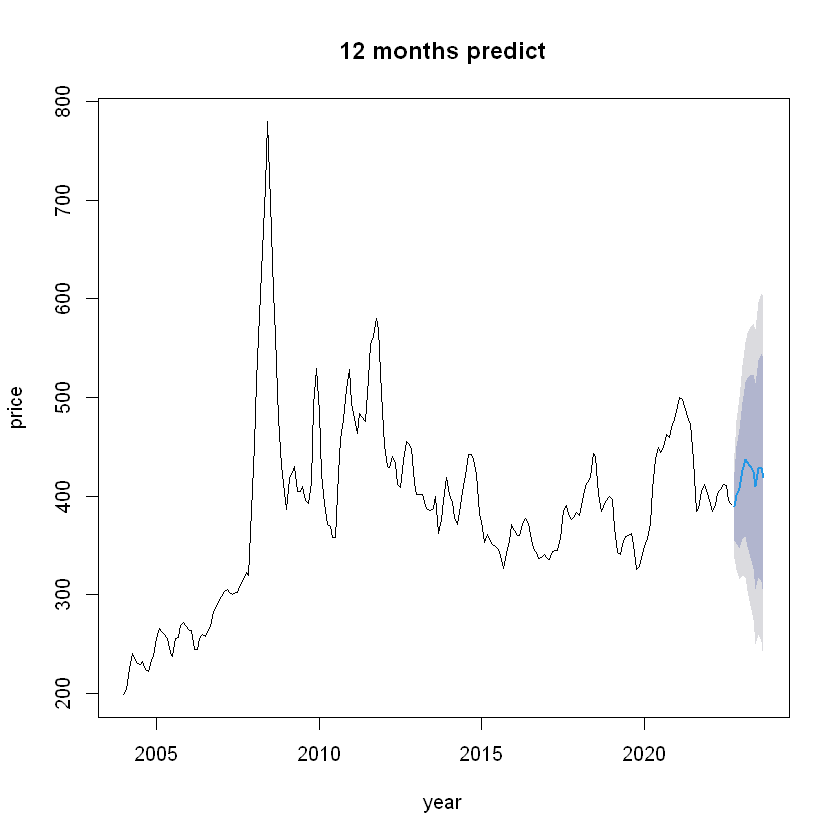

In [17]:
plot(price.timeseries.forecasts2,main='12 months predict',xlab='year',ylab='price')